# Introduction

In [35]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import random

In [36]:
columns = ["match_id", "player_slot", "chat_key", "unit", "radiant_win"]
chat_data = pd.read_csv('match_chat.csv', names=columns, encoding = "ISO-8859-1")
chat_data.head()

,match_id,player_slot,chat_key,unit,radiant_win
0,5008188550,128,yes you are girl,5,0
1,5008188550,128,xoxo,5,0
2,5008188550,1,stop,1,0
3,5008188550,1,I cant love the enemy,1,0
4,5008188550,130,I'd paint u,7,0


In [37]:
# according to the API, player_slot 0-127 are Radiant, 128-255 are Dire
chat_data['is_radiant'] = np.where(chat_data['player_slot']<=127, 1, 0)
# create a new column call win
win_condition = (chat_data['is_radiant'] == chat_data['radiant_win'])
chat_data['win'] = np.where(win_condition, 1, 0)
chat_data.head()

,match_id,player_slot,chat_key,unit,radiant_win,is_radiant,win
0,5008188550,128,yes you are girl,5,0,0,1
1,5008188550,128,xoxo,5,0,0,1
2,5008188550,1,stop,1,0,1,0
3,5008188550,1,I cant love the enemy,1,0,1,0
4,5008188550,130,I'd paint u,7,0,0,1


In [38]:
# drop unnecessary columns
chat_data = chat_data.drop(columns=['match_id','player_slot','unit','radiant_win','is_radiant'], axis=1)
chat_data.head()

,chat_key,win
0,yes you are girl,1
1,xoxo,1
2,stop,0
3,I cant love the enemy,0
4,I'd paint u,1


In [39]:
# Explore dataset

In [40]:
# What is the shape of the dataset

print("Input data has {} rows and {} columns.".format(len(chat_data), len(chat_data.columns)))

Input data has 4709 rows and 2 columns.


In [41]:
# number of rows in the dataset
len(chat_data)

4709

In [42]:
# How many wins/lost are there
print("Out of {} rows, {} are wins, {} are loses".format(len(chat_data),
                                                         len(chat_data[chat_data['win']==1]),
                                                         len(chat_data[chat_data['win']==0])))

Out of 4709 rows, 2578 are wins, 2131 are loses


In [43]:
# are there any missing data

print("Number of null in win: {}".format(chat_data['win'].isnull().sum()))
print("Number of null in chat_key: {}".format(chat_data['chat_key'].isnull().sum()))

Number of null in win: 0
Number of null in chat_key: 0


In [44]:
# Split dataset into training and testing set

In [45]:
train, test = train_test_split(chat_data, test_size=0.33)
print(train.shape)
print(test.shape)

(3155, 2)
(1554, 2)


In [46]:
train_x = train['chat_key']
train_y = train['win']
test_x = test['chat_key']
test_y = test['win']

In [44]:
count_vectorizer = CountVectorizer(stop_words="english",max_df=0.9,min_df=0.05)

train_count = count_vectorizer.fit_transform(train_x)
test_count = count_vectorizer.fit_transform(test_x)

tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_df=0.9,min_df=0.05)
train_tfidf = tfidf_vectorizer.fit_transform(train_x)
test_tfidf = tfidf_vectorizer.fit_transform(test_x)


In [49]:
tfidf_nb = MultinomialNB()

print(train_tfidf.shape)
print(train_y.shape)
tfidf_nb.fit(train_tfidf, train_y)

(3155, 2)
(3155,)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Linear SVC Model

In [91]:
svc = LinearSVC()
svc.fit(train_tfidf, train_y)
svc_predict = svc.predict(test_tfidf)
svc_score = metrics.accuracy_score(svc_predict, test_y)
print("LinearSVC Score: %0.3f" % svc_score)


LinearSVC Score: 0.555


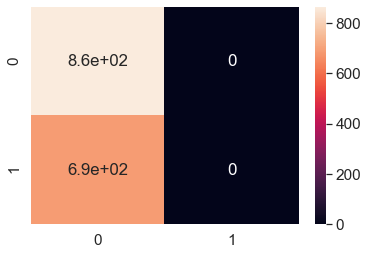

In [90]:
svc_confusion_matrix = metrics.confusion_matrix(test_y, svc_predict, labels=[1, 0])
#plot_confusion_matrix(svc_confusion_matrix, classes=[1,0], title ="TF-IDF LinearSVC Confusion Matrix")
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(svc_confusion_matrix, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True)
plt.show()